In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/training_preproc_dataframe_norm_peak_max.csv', index_col=[0])

In [3]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca2 = PCA(n_components=20)
pca2.fit(df.iloc[:,0:-1]) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA(n_components=20)

In [4]:
#let's use the pca to transform the dataset
df_pca = pd.DataFrame(pca2.transform(df.iloc[:,0:-1]))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.160799,-0.316275,1.237766,-0.569901,0.896724,0.075626,0.099812,0.060397,0.334848,0.379626,0.240781,0.012336,0.291246,0.133621,-0.087882,-0.180207,0.204587,0.249131,-0.336218,-0.151059
1,-1.147976,-0.383811,1.435480,-0.551887,0.970545,0.059590,-0.009499,0.083028,0.357651,0.479629,0.292772,-0.057892,0.404119,0.166852,-0.147526,-0.214173,0.201707,0.336659,-0.360615,-0.259061
2,-0.667557,-0.057729,0.487616,-0.307171,1.147623,0.264793,0.054319,0.172407,0.307470,0.139356,0.132540,-0.008015,0.285710,0.316997,-0.184902,-0.061091,0.290625,0.208088,-0.451652,-0.169713
3,-0.824708,-0.188753,1.199231,-0.486654,1.045442,0.162360,0.145802,0.053173,0.442230,0.415814,0.286641,-0.044287,0.486130,0.292184,-0.166331,-0.137962,0.278237,0.391204,-0.429313,-0.283936
4,-0.762511,-0.366835,0.605417,-0.298698,1.114230,0.207472,-0.075524,0.063500,0.329299,0.194338,0.242555,-0.021820,-0.021708,-0.088588,-0.090869,-0.076580,0.120321,0.117803,-0.146754,-0.074695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72470,-1.051565,0.754513,0.152767,-0.990932,-0.201437,-0.467235,-0.209257,0.059169,-0.179866,0.196467,-0.197611,-0.124300,0.029489,0.069287,-0.010172,0.011921,0.124284,0.018584,0.223163,0.017677
72471,-0.940376,0.907984,-0.003130,-0.935129,-0.176291,-0.521744,-0.244955,0.088083,-0.157432,0.171668,-0.166662,-0.035895,-0.056509,0.154644,-0.093473,0.026483,0.114223,0.107568,0.153070,0.070966
72472,-0.868357,0.871841,0.092970,-0.874385,-0.181056,-0.513143,-0.266918,0.040145,-0.146366,0.193956,-0.191347,-0.029498,0.006842,0.170510,-0.079861,0.024388,0.145399,0.066879,0.177112,0.063053
72473,-0.980155,0.880580,0.020252,-0.913613,-0.175004,-0.468032,-0.122017,0.110165,-0.212116,0.181855,-0.200369,-0.079175,0.070121,0.197242,-0.027210,0.090650,0.180954,0.024979,0.203086,0.062786


In [5]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca2.explained_variance_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.409007,1.398947,0.775725,0.415723,0.207544,0.124122,0.069597,0.06009,0.056661,0.046286,0.043761,0.039261,0.034491,0.031371,0.030011,0.025594,0.021956,0.020553,0.019029,0.018108


In [6]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca2.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.305827,0.177598,0.098479,0.052777,0.026348,0.015758,0.008835,0.007629,0.007193,0.005876,0.005556,0.004984,0.004379,0.003983,0.00381,0.003249,0.002787,0.002609,0.002416,0.002299


In [7]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var=np.cumsum(pca2.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.305827,0.483426,0.581905,0.634682,0.66103,0.676787,0.685623,0.693251,0.700444,0.70632,0.711876,0.71686,0.721239,0.725222,0.729032,0.732281,0.735068,0.737677,0.740093,0.742392


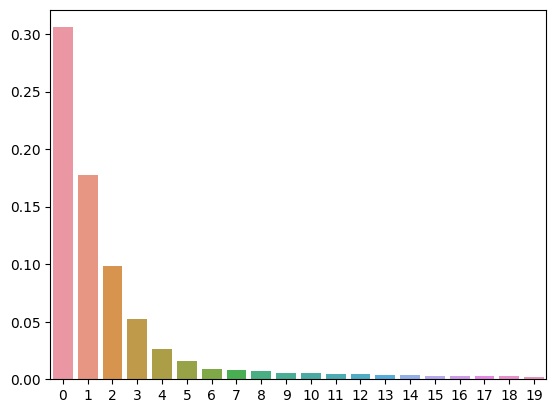

In [8]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

In [9]:
pca_df = pd.DataFrame(pca2.components_,columns=df.columns[0:-1])
pca_df

,620,621,622,623,624,625,626,627,628,629,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0.019675,0.013763,0.014632,0.008935,0.019262,0.014717,0.013565,0.014369,0.021998,0.012305,...,0.030142,0.030480,0.029738,0.028765,0.027872,0.030305,0.030538,0.027494,0.022209,0.001339
1,-0.009917,0.001634,0.002142,0.018647,-0.000121,0.005350,0.018078,0.010491,0.008982,0.022129,...,0.003733,0.003556,0.003749,0.003817,0.003620,0.003912,0.003434,0.003492,0.002237,0.000160
2,-0.040694,-0.006733,0.006844,0.000234,0.007172,0.003061,-0.007320,-0.006663,-0.035185,-0.027092,...,0.016486,0.016570,0.016011,0.015306,0.014935,0.016199,0.015816,0.013608,0.009060,0.000989
3,0.043533,0.013161,-0.000164,0.035050,0.002408,-0.004957,-0.011429,-0.018756,0.021042,0.017858,...,-0.006124,-0.006227,-0.005529,-0.005041,-0.005082,-0.005745,-0.005777,-0.004411,-0.003145,-0.000416
4,0.031906,0.014029,-0.001987,0.014622,0.019378,0.010750,0.003260,0.009128,0.084200,0.035692,...,-0.001817,-0.001512,-0.002960,-0.003325,-0.002901,-0.003148,-0.002294,-0.003875,-0.002641,0.000470
5,0.041870,0.013961,-0.000155,0.001213,0.018947,0.014724,-0.005430,0.012349,0.038478,0.008686,...,0.000167,0.000727,-0.001343,-0.001476,-0.001478,-0.001154,-0.001662,-0.003901,-0.003894,0.000568
6,-0.015692,0.004554,0.004697,0.004812,-0.013266,-0.007268,-0.018596,-0.007944,0.036814,0.011652,...,-0.000127,-0.001370,0.002266,0.003466,0.002266,0.000765,-0.001923,0.000389,-0.001555,-0.000562
7,0.030102,0.010995,0.001065,-0.017949,0.004199,-0.012560,0.008629,0.000682,0.033040,0.003128,...,0.001911,0.001522,0.001568,0.001212,0.001775,0.001658,0.001214,0.000674,-0.001127,0.000334
8,-0.036436,-0.008866,-0.005579,-0.026178,0.002059,0.003735,0.012943,0.001610,0.023752,0.008513,...,-0.004555,-0.005073,-0.003666,-0.003461,-0.003748,-0.004733,-0.004587,-0.002613,-0.000944,-0.000234
9,0.076779,0.019820,0.002500,-0.019049,0.010471,-0.001205,0.013946,0.013031,0.044927,0.008872,...,-0.003448,-0.003895,-0.003107,-0.002742,-0.003303,-0.003721,-0.004433,-0.003604,-0.003270,-0.000091


In [10]:
comp1 = pca_df.iloc[0,:]
comp2 = pca_df.iloc[1,:]

In [11]:
above04_1 = comp1[abs(comp1)>0.04]
above04_2 = comp2[abs(comp1)>0.04]

In [12]:
print(above04_1)

795     0.046419
836     0.082431
837     0.041382
840     0.064565
852     0.097803
853     0.058008
868     0.097027
869     0.046542
886     0.049707
898     0.071448
1095    0.079790
1096    0.047187
1105    0.083078
1106    0.044859
1111    0.042964
1267    0.041898
1459    0.054405
1460    0.051067
1465    0.054833
1466    0.044740
1529   -0.051301
Name: 0, dtype: float64


In [13]:
above04_1.shape

(21,)

In [14]:
print(above04_2)

795    -0.076570
836    -0.159073
837    -0.032097
840    -0.122539
852    -0.191273
853    -0.095844
868    -0.181796
869    -0.069227
886    -0.083708
898    -0.182803
1095   -0.183769
1096   -0.092796
1105   -0.217819
1106   -0.098551
1111   -0.089647
1267   -0.118484
1459   -0.149509
1460   -0.097861
1465   -0.165415
1466   -0.091401
1529    0.109920
Name: 1, dtype: float64


In [15]:
above04_2.shape

(21,)

In [16]:
df[0:-1]

,620,621,622,623,624,625,626,627,628,629,...,3192,3193,3194,3195,3196,3197,3198,3199,3200,Labels
0,0.026182,0.022669,-0.000527,0.011488,0.031689,0.045476,0.017688,0.047419,0.225075,0.071854,...,0.021085,0.015909,0.012906,0.010470,0.014855,0.014974,0.012253,0.012486,-0.000235,0
1,0.052004,0.034908,0.011458,0.022766,0.031904,0.033563,0.014679,0.028253,0.255202,0.090293,...,0.020116,0.016117,0.012418,0.018298,0.015203,0.022505,0.030314,0.011670,-0.000407,0
2,0.046172,0.054785,-0.001966,0.050852,0.046370,0.015035,0.048541,0.041717,0.272539,0.128269,...,0.012737,0.025325,0.018688,0.013208,0.012645,0.014512,0.011679,0.014822,-0.000472,0
3,0.040555,0.011655,0.028215,0.022512,0.054881,0.025612,0.004474,0.026742,0.291049,0.068703,...,0.007438,0.022492,0.033491,0.040147,0.035822,0.024675,0.040160,0.025815,-0.000719,0
4,0.060856,0.057231,0.008428,0.014791,0.052786,0.024617,0.038185,0.082988,0.222061,0.104471,...,0.006535,0.019502,0.020426,0.014857,0.011405,0.009428,0.010850,0.009971,-0.000426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72469,0.072278,0.023929,0.006592,-0.001142,0.005513,0.013880,0.095927,0.074656,0.107074,0.085497,...,0.005727,0.010751,0.012764,0.012105,0.015114,0.013795,0.023963,0.019749,-0.000302,1
72470,0.130018,0.043698,0.005903,0.037471,-0.002231,0.009924,0.100573,0.064489,0.140306,0.099979,...,0.010659,0.011956,0.009612,0.014492,0.015685,0.021093,0.016728,0.021738,-0.000284,1
72471,0.136923,0.021606,-0.002464,0.031724,0.005778,0.001652,0.123062,0.097440,0.139884,0.105187,...,0.011254,0.022582,0.012548,0.005991,0.021251,0.016217,0.008430,0.011288,-0.000355,1
72472,0.143582,0.025788,-0.002429,0.030268,0.017180,0.030307,0.119246,0.067085,0.131226,0.102596,...,0.018292,0.018191,0.011301,0.009988,0.016352,0.011394,0.020376,0.024486,-0.000468,1


In [17]:
df_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11','PC12', 'PC13','PC14','PC15','PC16','PC17','PC18', 'PC19','PC20']
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-1.160799,-0.316275,1.237766,-0.569901,0.896724,0.075626,0.099812,0.060397,0.334848,0.379626,0.240781,0.012336,0.291246,0.133621,-0.087882,-0.180207,0.204587,0.249131,-0.336218,-0.151059
1,-1.147976,-0.383811,1.435480,-0.551887,0.970545,0.059590,-0.009499,0.083028,0.357651,0.479629,0.292772,-0.057892,0.404119,0.166852,-0.147526,-0.214173,0.201707,0.336659,-0.360615,-0.259061
2,-0.667557,-0.057729,0.487616,-0.307171,1.147623,0.264793,0.054319,0.172407,0.307470,0.139356,0.132540,-0.008015,0.285710,0.316997,-0.184902,-0.061091,0.290625,0.208088,-0.451652,-0.169713
3,-0.824708,-0.188753,1.199231,-0.486654,1.045442,0.162360,0.145802,0.053173,0.442230,0.415814,0.286641,-0.044287,0.486130,0.292184,-0.166331,-0.137962,0.278237,0.391204,-0.429313,-0.283936
4,-0.762511,-0.366835,0.605417,-0.298698,1.114230,0.207472,-0.075524,0.063500,0.329299,0.194338,0.242555,-0.021820,-0.021708,-0.088588,-0.090869,-0.076580,0.120321,0.117803,-0.146754,-0.074695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72470,-1.051565,0.754513,0.152767,-0.990932,-0.201437,-0.467235,-0.209257,0.059169,-0.179866,0.196467,-0.197611,-0.124300,0.029489,0.069287,-0.010172,0.011921,0.124284,0.018584,0.223163,0.017677
72471,-0.940376,0.907984,-0.003130,-0.935129,-0.176291,-0.521744,-0.244955,0.088083,-0.157432,0.171668,-0.166662,-0.035895,-0.056509,0.154644,-0.093473,0.026483,0.114223,0.107568,0.153070,0.070966
72472,-0.868357,0.871841,0.092970,-0.874385,-0.181056,-0.513143,-0.266918,0.040145,-0.146366,0.193956,-0.191347,-0.029498,0.006842,0.170510,-0.079861,0.024388,0.145399,0.066879,0.177112,0.063053
72473,-0.980155,0.880580,0.020252,-0.913613,-0.175004,-0.468032,-0.122017,0.110165,-0.212116,0.181855,-0.200369,-0.079175,0.070121,0.197242,-0.027210,0.090650,0.180954,0.024979,0.203086,0.062786


In [18]:
import random
index = random.sample(range(0, 72474), 1000)

<ipython-input-19-d0e39f292bb5>:12: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  p1.legend()


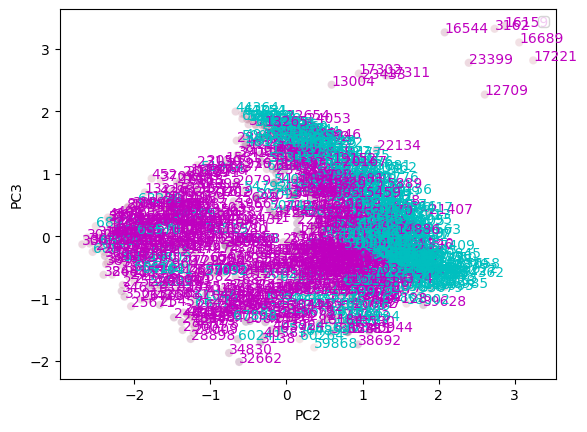

In [19]:
p1=sns.scatterplot(x="PC2", y="PC3",
              alpha=.3,
              hue="PC6", legend=False,
              data=df_pca.iloc[index,:]);

# add annotations one by one with a loop
for line in index:
    if line < 44335:
      p1.text(df_pca.PC2[line], df_pca.PC3[line], line, horizontalalignment='left', size='medium', color='m', label='cca')
    else:
      p1.text(df_pca.PC2[line], df_pca.PC3[line], line, horizontalalignment='left', size='medium', color='c', label='hcc')
p1.legend()



In [20]:
df.iloc[44335,-1]

1

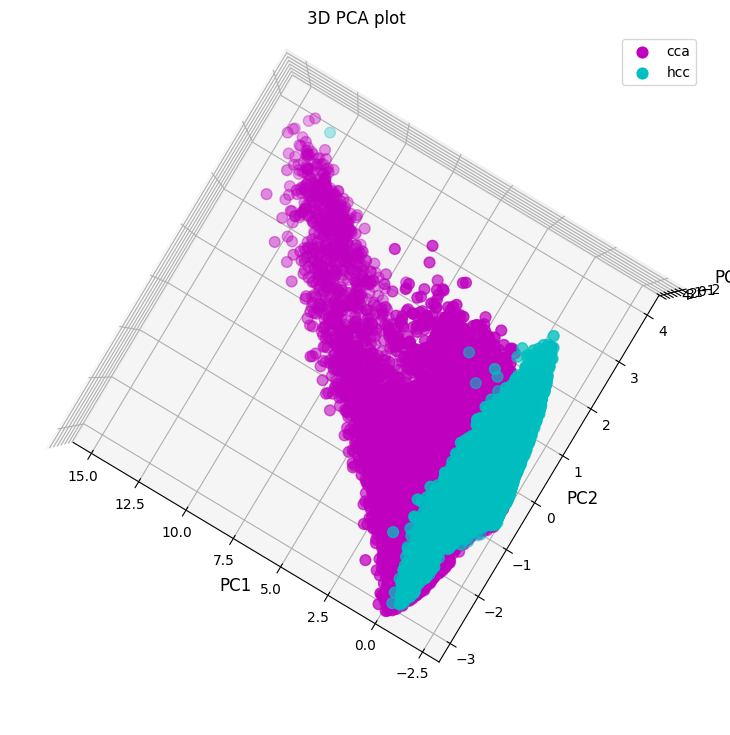

In [21]:
import matplotlib.pyplot as plt

Xax = df_pca.iloc[:,0].values
Yax = df_pca.iloc[:,1].values
Zax = df_pca.iloc[:,2].values
cdict = {0:'m',1:'c'}
label = {0:'cca',1:'hcc'}
y = df['Labels'].values

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111,
                     projection='3d')

for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix],
            Yax[ix],
            Zax[ix],
            c=cdict[l],
            s=60,
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(270, 60)
ax.legend()
plt.title("3D PCA plot")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

y = df.iloc[:,-1].values
X = df_pca.iloc[:,:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [23]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn40 = KNeighborsClassifier(n_neighbors=40)

knn40.fit(X_train, y_train)
y_pred = knn40.predict(X_test)
y_pred_train = knn40.predict(X_train)
scores = cross_val_score(knn40, X, y, cv=5)
scores = scores.tolist()

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

[[14531   106]
 [  133  9147]]
***RESULTS ON TRAIN SET***
precision:  0.9889620038208449
recall:  0.9881230116648992
f1_score:  0.9885423297262891
accuracy:  0.9911034227109848
***RESULTS ON TEST SET***
precision:  0.9885442559169999
recall:  0.9856681034482758
f1_score:  0.9871040846058381
accuracy:  0.9900071079148722


In [24]:
X_train.shape


(48558, 20)

In [25]:
from sklearn.naive_bayes import GaussianNB

NaiveB = GaussianNB()

NaiveB.fit(X_train, y_train)
y_pred = NaiveB.predict(X_test)
y_pred_train = NaiveB.predict(X_train)
scores.append(cross_val_score(NaiveB, X, y, cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TRAIN SET***
precision:  0.9061105295057579
recall:  0.8719512195121951
f1_score:  0.888702747980221
accuracy:  0.9151736068207093
***RESULTS ON TEST SET***
precision:  0.9069871938890137
recall:  0.8700431034482758
f1_score:  0.8881311186888131
accuracy:  0.914955889116528


In [26]:
from sklearn.tree import DecisionTreeClassifier

DecTree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

DecTree.fit(X_train, y_train)
y_pred_train = DecTree.predict(X_train)
y_pred = DecTree.predict(X_test)
scores.append(cross_val_score(DecTree, X, y, cv=5))


print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.9922101643923928
recall:  0.9792682926829268
f1_score:  0.9856967497464909
accuracy:  0.98896165410437
***RESULTS ON TEST SET***
precision:  0.9814163184517264
recall:  0.9617456896551724
f1_score:  0.9714814411668662
accuracy:  0.9780908976878371


In [27]:

from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)

rand_forest.fit(X_train, y_train)
y_pred_train = rand_forest.predict(X_train)
y_pred = rand_forest.predict(X_test)
scores.append(cross_val_score(rand_forest, X, y, cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TRAIN SET***
precision:  0.9867395988728659
recall:  0.9469247083775185
f1_score:  0.9664222516842987
accuracy:  0.9744429342229911
***RESULTS ON TEST SET***
precision:  0.9860076732114647
recall:  0.9415948275862069
f1_score:  0.9632896042332709
accuracy:  0.9721536982062968


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=10, solver='lbfgs', max_iter=300000)

LogReg.fit(X_train, y_train)
y_pred_train = LogReg.predict(X_train)
y_pred = LogReg.predict(X_test)
scores.append(cross_val_score(LogReg, X, y, cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.9864649681528662
recall:  0.9854188759278897
f1_score:  0.9859416445623341
accuracy:  0.9890852176778285
***RESULTS ON TEST SET***
precision:  0.9855665661352865
recall:  0.9859913793103449
f1_score:  0.9857789269553976
accuracy:  0.9889618263160095


In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1)

svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred = svm.predict(X_test)
scores.append(cross_val_score(svm, X, y, cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.986465686534685
recall:  0.9854718981972428
f1_score:  0.9859685419484895
accuracy:  0.9891058116067384
***RESULTS ON TEST SET***
precision:  0.9864194869583962
recall:  0.9862068965517241
f1_score:  0.9863131802996012
accuracy:  0.9893799389555546


In [30]:
data = [np.array(scores[0:4]), scores[5], scores[6], scores[7], scores[8], scores[9]]

In [31]:
print(data)

[array([0.98827182, 0.94694722, 0.98295964, 0.87892377]), array([0.94701621, 0.85850293, 0.90734736, 0.74432563, 0.85077613]), array([0.95467403, 0.92307692, 0.9503277 , 0.90486375, 0.89113487]), array([0.98233874, 0.93390824, 0.95833046, 0.88016557, 0.93811659]), array([0.98144188, 0.98765091, 0.96543636, 0.92252501, 0.97440497]), array([0.98344257, 0.987099  , 0.96674715, 0.92211107, 0.9735771 ])]


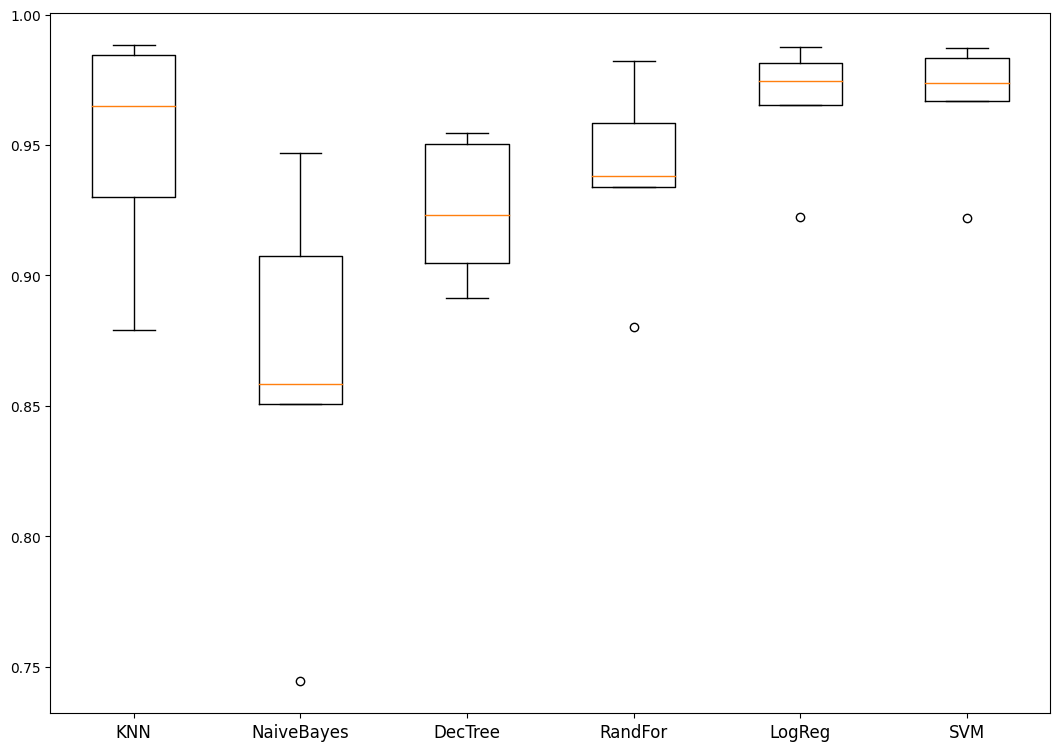

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(['KNN', 'NaiveBayes',
                    'DecTree', 'RandFor',
                    'LogReg', 'SVM'])
plt.xticks(fontsize=12)

# show plot
plt.show()

In [33]:
df_mix = pd.read_csv('/content/drive/MyDrive/dataframe_preproc_peakmax_mix.csv', index_col=[0])

In [34]:
x_mix = df_mix.iloc[:,:]
x_t = pca2.transform(x_mix)

In [35]:
pred_knn = knn40.predict(x_t)
pred_naiveb = NaiveB.predict(x_t)
pred_dectree = DecTree.predict(x_t)
pred_randfor = rand_forest.predict(x_t)
pred_logreg = LogReg.predict(x_t)
pred_svm = svm.predict(x_t)

In [36]:
!pip install pyimzml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wheezy.template: filename=wheezy.template-3.2.0-cp310-cp310-linux_x86_64.whl size=2501854 sha256=40aae06f00357aa710de9d65a7343928fe5b45b153ec73c57e452bfe7cabb929
  Stored in directory: /root/.cache/pip/wheels/8d/5c/d9/6b088a4ef28a812020a60c400216c500d1b8fd20fd2b8d9d1f
Successfully built wheezy.template


In [37]:
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLParser import getionimage

hcc_cca = ImzMLParser('/content/drive/MyDrive/18ag_01666-20012022.imzML', include_spectra_metadata = None )
coord_mix_18 = enumerate(hcc_cca.coordinates)

(mz, spectrum0) = hcc_cca.getspectrum(0)
(mz, spectrum1) = hcc_cca.getspectrum(1)
Spec_Data = []
XCoord_mix_18 = []
YCoord_mix_18 = []
for i, (x,y,z) in coord_mix_18:
        (mz, spectrum) = hcc_cca.getspectrum(i)
        Spec_Data.append(spectrum)
        XCoord_mix_18.append(x)
        YCoord_mix_18.append(y)
image_mixed_18 = getionimage(hcc_cca, 1200, tol=0.1, z=1)
dimensions_18 = image_mixed_18.shape

/usr/local/lib/python3.10/dist-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  warn(


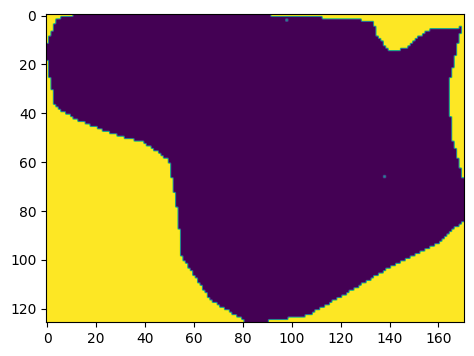

In [43]:
import numpy as np
predicted_18 = 2*np.ones(dimensions_18)
for i in range(0, len(pred_logreg)):
    indx = XCoord_mix_18[i]-1
    indy = YCoord_mix_18[i]-1

    predicted_18[indy, indx] = pred_logreg[i]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 4))
plt.imshow(predicted_18)